# การสร้าง Model สำหรับ Text Classification โดยใช้ Bag-of-word Feature กับ Standard Feedforward Neural Network

In [29]:
pip install deepcut


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import csv
import numpy as np
import deepcut
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical, set_random_seed
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.metrics import confusion_matrix

set_random_seed(99)

**Read raw data form music_tu.csv.**

ขอให้ Copy File music_tu.csv ที่จะใช้ในตัวอย่างนี้จาก url ด้านล่างนี้ลงใน Google Drive ของตนเอง

https://drive.google.com/file/d/1B62Bl-mmZPrPmPWQDTczXJ_L6YPTwkK6/view?usp=sharing

และเปลี่ยนตำแหน่งของไฟล์ music_tu.csv ใน Source Code ด้านล่างนี้จาก '/content/drive/MyDrive/music_tu.csv' ไปเป็นตำแหน่งที่นักศึกษา Copy Folder ของภาพไว้ใน Google Drive ของตัวเอง

In [31]:
# Read input.txt and ans.txt into separate lists
with open('input.txt', 'r', encoding='utf-8-sig') as input_file:
    input_data = [line.strip().split('::')[1] for line in input_file]

with open('ans.txt', 'r', encoding='utf-8-sig') as ans_file:
    ans_data = [line.strip().split('::')[1] for line in ans_file]
    
ans_data = [item[0] for item in ans_data]

# # Create a dictionary of unique characters
# char_to_idx = {char: idx for idx, char in enumerate(set(''.join(ans_data)))}

# # Convert characters to one-hot encoding
# def one_hot_encode(char):
#     vector = np.zeros(len(char_to_idx))
#     vector[char_to_idx[char]] = 1
#     return vector

# ans_data = [one_hot_encode(char) for char in ''.join(ans_data)]

# Shuffle the input data
# shuffle(input_data)

# Create a list to store the combined data
combined_data = []

# Iterate through the input and ans data and combine them
for input_line, ans_line in zip(input_data, ans_data):
    combined_line = [ans_line, input_line]
    combined_data.append(combined_line)

# Shuffle the input data
shuffle(combined_data)
# Print the result as a list of lists
for combined_line in combined_data:
    print(combined_line)

['T', 'ตานี้ก็เข้าเกมไม่ได้ ตาหน้าก็ไม่ได้เล่น']
['P', 'ตาของแม่สายตายาว']
['P', 'นางสาวมุทิตาได้รางวัลจากตาเพราะเรียนได้ที่หนึ่ง']
['T', 'ไม่มีตาไหนที่เธอไม่โยนเกม']
['E', 'หมอตาตรวจดวงตาของฉัน']
['E', 'การนอนตะแคงเล่นโทรศัพท์มีโอกาสทำให้สายตาเอียง']
['P', 'เธอดูสิ ตาคนนี้นี่แหละที่ถูกทิ้งไปตอนเด็ก ทำไมตาคนนี้ถึงมีชีวิตที่ดีขึ้นขนาดนี้นะ']
['P', 'ตาแก่สองคนกำลังนั่งจ้องตากัน']
['E', "vel'koz เป็นสัตว์ประหลาดจาก Void ที่มีดวงตาขนาดใหญ่อยู่ตรงกลาง"]
['E', 'ตาของเขาเป็นสีน้ำตาล']
['P', 'คุณตาและคุณยายตอนนี้แก่มากแล้วเลยทำให้ดวงตาฝ้าฟาง']
['E', 'สายตาเธอหลอกฉันไม่ได้']
['E', 'ฉันจึงเลิกใช้ที่ปัดขนตา']
['T', 'ตานี้บอด ตาหน้าเอาใหม่']
['T', 'ตาที่เธอเล่นได้ดีมีอยู่จริงไหม']
['P', 'ตาเอ้ย วันนี้ตาฉันนวดเอวให้นะ']
['T', 'ตานี้จะเป็นรอบสุดท้ายหรือตาหน้าจะเป็นตาสุดท้ายกันแน่นะ']
['E', 'ดวงตาเห็นธรรมเหนือวัตถุ เป็นผลงานที่สื่อให้เห็นถึงจิตกับวัตถุ']
['P', 'เอามานี่ เขาทำกันแบบนี้ เธอนี่มันไม่รู้ตาสีตาสา']
['E', 'หมอที่รักษาเกี่ยวกับตาคือหมอเฉพาะทาง']
['P', 'ตาชอบสีน้ำตาล']
['E', 'ดลกวาดสายตาอ่าน

**Create dataset. Extract labels and sentences.**

In [32]:
labels = [d[0] for d in combined_data]
sentences = [d[1] for d in combined_data]

print(labels)
print(sentences)

['T', 'P', 'P', 'T', 'E', 'E', 'P', 'P', 'E', 'E', 'P', 'E', 'E', 'T', 'T', 'P', 'T', 'E', 'P', 'E', 'P', 'E', 'P', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'T', 'E', 'P', 'P', 'P', 'T', 'P', 'E', 'E', 'P', 'E', 'E', 'P', 'P', 'P', 'P', 'P', 'E', 'P', 'P', 'T', 'P', 'E', 'E', 'P', 'E', 'E', 'E', 'P', 'T', 'T', 'P', 'P', 'E', 'P', 'T', 'E', 'P', 'E', 'P', 'P', 'E', 'E', 'P', 'P', 'T', 'E', 'P', 'E', 'T', 'E', 'T', 'T', 'P', 'E', 'P', 'E', 'P', 'T', 'T', 'E', 'E', 'E', 'E', 'P', 'E', 'P', 'E', 'P', 'P', 'T', 'E', 'E', 'E', 'E', 'E', 'P', 'P', 'E', 'P', 'T', 'E', 'P', 'E', 'E', 'E', 'E', 'E', 'E', 'T', 'T', 'P', 'E', 'P', 'P', 'E', 'P', 'E', 'T', 'P', 'P', 'T', 'P', 'E', 'E', 'E', 'E', 'T', 'T', 'P', 'T', 'T', 'E', 'T', 'T', 'P', 'E', 'P', 'P', 'T', 'P', 'T', 'E', 'P', 'E', 'P', 'E', 'P', 'T', 'E', 'E', 'P', 'E', 'T', 'P', 'P', 'E', 'P', 'P', 'E', 'P', 'E', 'T', 'P', 'T', 'E', 'E', 'P', 'P', 'P', 'E', 'E', 'E', 'T', 'E', 'E', 'P', 'E', 'P', 'T', 'E', 'E', 'P', 'E', 'P', 'P', 'T', 'E',

**Tokenize each sentence into a list of words.**

In [33]:
words = [[w for w in deepcut.tokenize(s) if w != ' '] for s in sentences]
for sentence in words:
    print(sentence)

1/1 [==============================] - 0s 44ms/step
['ตา', 'นี้', 'ก็', 'เข้า', 'เกม', 'ไม่', 'ได้', 'ตาหน้า', 'ก็', 'ไม่', 'ได้', 'เล่น']
['ตา', 'ของ', 'แม่', 'สาย', 'ตา', 'ยาว']
['นางสาวมุทิตา', 'ได้', 'รางวัล', 'จาก', 'ตา', 'เพราะ', 'เรียน', 'ได้', 'ที่', 'หนึ่ง']
['ไม่', 'มี', 'ตา', 'ไหน', 'ที่', 'เธอ', 'ไม่', 'โยน', 'เกม']
['หมอ', 'ตา', 'ตรวจ', 'ดวง', 'ตา', 'ของ', 'ฉัน']
['การ', 'นอน', 'ตะแคง', 'เล่น', 'โทรศัพท์', 'มี', 'โอกาส', 'ทำ', 'ให้', 'สายตา', 'เอียง']
['เธอ', 'ดู', 'สิ', 'ตา', 'คน', 'นี้', 'นี่', 'แหละ', 'ที่', 'ถูก', 'ทิ้ง', 'ไป', 'ตอน', 'เด็ก', 'ทำไม', 'ตา', 'คน', 'นี้', 'ถึง', 'มี', 'ชีวิต', 'ที่', 'ดี', 'ขึ้น', 'ขนาด', 'นี้', 'นะ']
['ตาแก่', 'สอง', 'คน', 'กำลัง', 'นั่ง', 'จ้อง', 'ตากัน']
['vel', "'", 'koz', 'เป็น', 'สัตว์', 'ประหลาด', 'จาก', 'Void', 'ที่', 'มี', 'ดวง', 'ตา', 'ขนาด', 'ใหญ่', 'อยู่', 'ตรง', 'กลาง']
['ตา', 'ของ', 'เขา', 'เป็น', 'สี', 'น้ำตาล']
['คุณ', 'ตา', 'และ', 'คุณ', 'ยาย', 'ตอน', 'นี้', 'แก่', 'มาก', 'แล้ว', 'เลย', 'ทำ', 'ให้', 'ดวง', 'ตา', 'ฝ้า', 'ฟ

**Find all possible words (vocab).**

In [34]:
vocab = set([w for s in words for w in s])
print('Vocab size = '+str(len(vocab)))
print(vocab)


Vocab size = 4267
{'figure', 'ต่าง', 'ประสาท', 'มา', 'กระสุน', 'แคร์', 'งาน', 'ธรรมดา', 'ขนาด', 'กลมโต', 'ไนกี้', 'ฟร็องซ์', 'ญาติ', 'ไอ้บ้าเอ้ย', 'ตาปลาทู', 'เสมือน', 'เยิ้ม', 'สิคดู', 'ตาเรา', 'ประฉะ', 'มาก', 'สิทธิ', 'ฉุกเฉิน', 'ดีเยอะ', 'ภาย', 'เยอะ', 'ฮันนี่', 'ตาเอกเล่น', 'ที่วัด', 'กะเพราหมู', 'นอน', 'แกะ', 'ไบ', 'แม่สอด', 'กูกะรอเล่น', 'ใจดี', 'ส่ะ', 'ขาย', 'ทวง', 'เบื่อ', 'กรีก', 'วัดบางกอก', 'อยาก', 'ยาว', '-', 'ตานี', 'ตารึ', 'blackinblack', 'ดัน', 'ปิดตา', 'กำจัด', 'ตรวจ', 'ป่า', 'ตาตอบ', 'รึเปล่า', 'จอจึง', 'เลง', 'ห้า', 'อย่าง', 'ควง', 'ตาติด', 'เขา', 'คาดเดา', 'หาตาหน่อย', 'ชื่อ', 'เสียสละ', 'ตกปลา', 'รัฐบาล', 'โดด', 'คลั่งรัก', 'ดั่ง', 'เทนไป', 'ๆ', 'ทนายความ', 'สแกน', 'โว้ยยยยยย', 'อยากิน', 'คุณ', 'การ์ด', 'เธอมตลอด', 'ปอง', 'สะท้อน', 'พระญาติ', 'สิสวย', 'ย่อย', '400', 'สิวะ', 'ชีวิต', 'ตำรวจ', 'ใส่ตา', 'ไก่ไข่', 'โดนัท', 'แมลง', 'ระเบิด', 'เหมือนตาแก้ว', 'แคว้นกาตาลัน', 'เปล่ง', 'เก็บปืน', 'ก็ตา', 'ซักฟอก', 'ตาม้อยตา', 'มากนะ', 'เมตร', 'น้ำลาย', 'ตาตามใจ', 'นิมน', 'ซ่

**Extract bag-of-word feature for each sentence**

In [35]:
bag_of_words = np.zeros((len(words),len(vocab)))
for i in range(0,len(words)): # i = sentense id
    count = 0
    for j in range(0,len(words[i])): # j = word id
        k = 0
        for w in vocab:
            if(words[i][j] == w):
                bag_of_words[i][k] = bag_of_words[i][k]+1
                count = count+1
            k = k+1
    bag_of_words[i] = bag_of_words[i]/count

print(bag_of_words.shape)
print(bag_of_words[0])

(4818, 4267)
[0. 0. 0. ... 0. 0. 0.]


**Create a feedforward neural network.**

In [42]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Assuming you have defined your vocabulary size and num_classes
vocab_size = len(vocab)
num_classes = 3

input_layer = Input(shape=(vocab_size,))
h1 = Dense(64, activation='tanh')(input_layer)
h2 = Dense(64, activation='tanh')(h1)
dropout_layer = Dropout(0.5)(h2)
h3 = Dense(64, activation='tanh')(dropout_layer)
h4 = Dense(64, activation='tanh')(h3)

# Output layer: Change the number of units to num_classes (41)
output_layer = Dense(num_classes, activation='softmax')(h4)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 4267)]            0         
                                                                 
 dense_41 (Dense)            (None, 64)                273152    
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 3)                 195 

**Train the network with training set + validation set of 240 samples (0-239).**

In [43]:
unique_labels = np.unique(labels)
num_classes = len(unique_labels)
print(f"Number of unique classes: {num_classes}")
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)  
one_hot_labels = to_categorical(encoded_labels)

history = model.fit(bag_of_words[:3855],  one_hot_labels[:3855], epochs=100, batch_size=50, validation_split = 0.5) #Train 192 sample, validate 48 sample

Number of unique classes: 3
Epoch 1/100
39/39 [==============================] - 2s 22ms/step - loss: 1.0129 - accuracy: 0.4587 - val_loss: 0.9277 - val_accuracy: 0.6167
Epoch 2/100
39/39 [==============================] - 1s 19ms/step - loss: 0.6949 - accuracy: 0.7270 - val_loss: 0.6607 - val_accuracy: 0.7178
Epoch 3/100
39/39 [==============================] - 1s 19ms/step - loss: 0.3901 - accuracy: 0.8537 - val_loss: 0.6274 - val_accuracy: 0.7505
Epoch 4/100
39/39 [==============================] - 1s 19ms/step - loss: 0.2284 - accuracy: 0.9253 - val_loss: 0.7287 - val_accuracy: 0.7505
Epoch 5/100
39/39 [==============================] - 1s 19ms/step - loss: 0.1443 - accuracy: 0.9549 - val_loss: 0.8987 - val_accuracy: 0.7344
Epoch 6/100
39/39 [==============================] - 1s 18ms/step - loss: 0.1007 - accuracy: 0.9689 - val_loss: 0.9939 - val_accuracy: 0.7386
Epoch 7/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0657 - accuracy: 0.9818 - val_loss: 1.1368 -

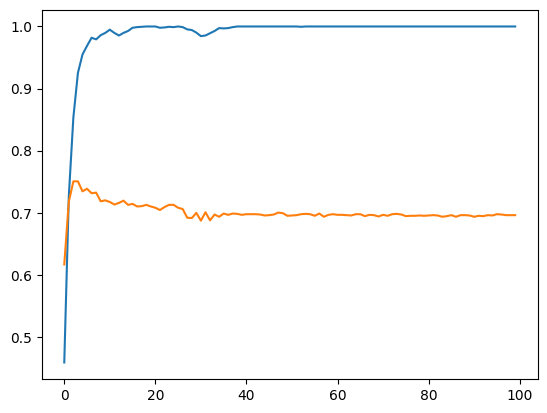

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

**Test the network with test set of 60 samples (240-299).**

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Calculate predicted labels
y_pred = model.predict(bag_of_words[3855:])

# Encode true labels using the same LabelEncoder
label_encoder = LabelEncoder()
encoded_true_labels = label_encoder.fit_transform(labels[3855:])

# Calculate confusion matrix
cm = confusion_matrix(encoded_true_labels, y_pred.argmax(axis=1))
print('Confusion Matrix')
print(cm)

# Calculate accuracy
accuracy = accuracy_score(encoded_true_labels, y_pred.argmax(axis=1))
print('Accuracy')
print(accuracy)

# Generate classification report with specified labels
report = classification_report(
    encoded_true_labels,
    y_pred.argmax(axis=1),
    target_names=label_encoder.classes_,
    labels=label_encoder.transform(label_encoder.classes_)
)
print('Classification Report')
print(report)


31/31 [==============================] - 0s 7ms/step
Confusion Matrix
[[275  92  31]
 [ 90 276  46]
 [ 16  39  98]]
Accuracy
0.6739356178608515
Classification Report
              precision    recall  f1-score   support

           E       0.72      0.69      0.71       398
           P       0.68      0.67      0.67       412
           T       0.56      0.64      0.60       153

    accuracy                           0.67       963
   macro avg       0.65      0.67      0.66       963
weighted avg       0.68      0.67      0.68       963

